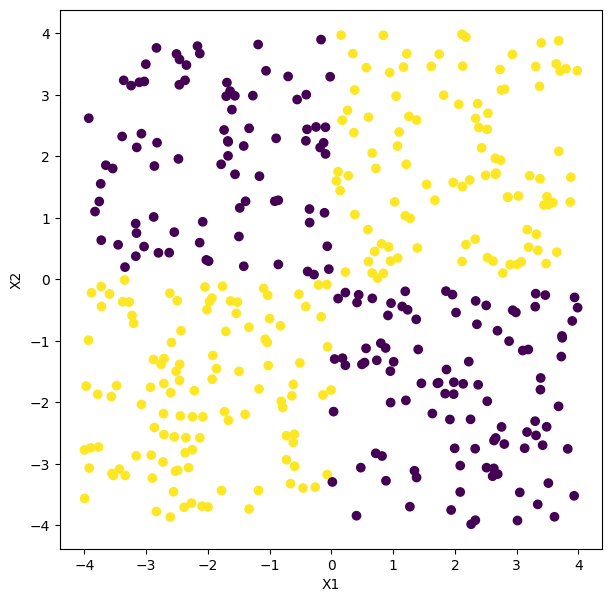

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.where(np.sign(x[:,0]).astype(int)*np.sign(x[:,1]).astype(int)>=0,1,0)

plt.figure(figsize=(7,7))
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

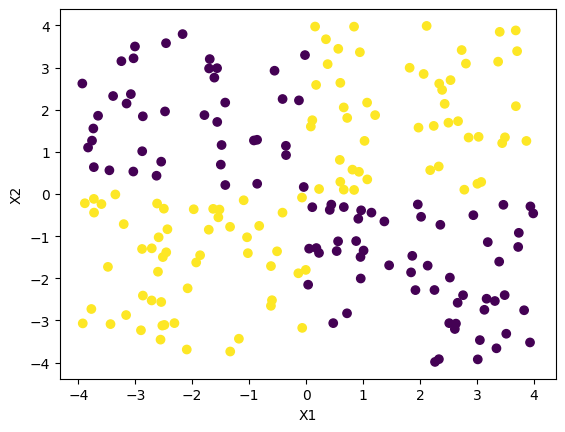

In [2]:

# plt.figure(figsize=(7,7))
plt.scatter(x[:200,0],x[:200,1],c=y[:200])
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

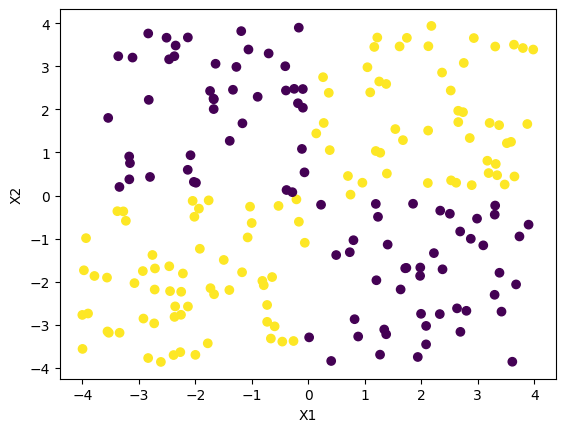

In [3]:

# plt.figure(figsize=(7,7))
plt.scatter(x[200:400,0],x[200:400,1],c=y[200:400])
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

# right approach

## Part A. a MLP

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train = x[:170,:]
Y_train = y[:170]

X_val=x[170:200,:]
Y_val=y[170:200]

X_test = x[200:400,:]
Y_test = y[200:400]

In [6]:
# Create a model class
class Model(nn.Module):
    def __init__(self,in_features=2,h1=4,out_features=1):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.out=nn.Linear(h1,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.out(x)
        return x

In [7]:
torch.manual_seed(41)
model=Model()

In [8]:
logits=model(torch.from_numpy(X_train).float())
nn.Sigmoid()(logits)
# print(nn.Sigmoid()(logits))
# print(model(torch.from_numpy(X_train).float()))

tensor([[0.6606],
        [0.5981],
        [0.6147],
        [0.5896],
        [0.6918],
        [0.7879],
        [0.8070],
        [0.6355],
        [0.8406],
        [0.6009],
        [0.7711],
        [0.6329],
        [0.6018],
        [0.6670],
        [0.6013],
        [0.6150],
        [0.6487],
        [0.7365],
        [0.7022],
        [0.7244],
        [0.6351],
        [0.6407],
        [0.6028],
        [0.6741],
        [0.8215],
        [0.6273],
        [0.6182],
        [0.7660],
        [0.8150],
        [0.8154],
        [0.6536],
        [0.8837],
        [0.6070],
        [0.7904],
        [0.7932],
        [0.6714],
        [0.5866],
        [0.8510],
        [0.7774],
        [0.6865],
        [0.5992],
        [0.6754],
        [0.6441],
        [0.6281],
        [0.6956],
        [0.6515],
        [0.7326],
        [0.7147],
        [0.5750],
        [0.8025],
        [0.7020],
        [0.6231],
        [0.6111],
        [0.8224],
        [0.5716],
        [0

In [9]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [10]:
X_train_tensor = torch.from_numpy(X_train).float()
Y_train_tensor = torch.from_numpy(Y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
Y_val_tensor = torch.from_numpy(Y_val).float()

In [11]:
print(Y_val)

[1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1]


In [12]:
converged = False
prev_loss =1e8
epochs = 1000
losses = []
train_acc = []
val_acc = []

for i in range(epochs):
    optimizer.zero_grad()
    logits=model(X_train_tensor)
    loss = criterion(logits,Y_train_tensor.view(-1,1))
    loss.backward()
    optimizer.step()
    losses.append(loss)
    if i%10==0:
        print(f'Epoch {i} loss is {loss}')
    if np.abs(prev_loss-loss.item())<1e-5:
        converged = True
        break
    prev_loss = loss.item()


Epoch 0 loss is 0.7499789595603943
Epoch 10 loss is 0.6442840695381165
Epoch 20 loss is 0.5851067304611206
Epoch 30 loss is 0.5307934880256653
Epoch 40 loss is 0.48395925760269165
Epoch 50 loss is 0.4464680254459381
Epoch 60 loss is 0.41394492983818054
Epoch 70 loss is 0.3843206465244293
Epoch 80 loss is 0.3571971356868744
Epoch 90 loss is 0.3303447365760803
Epoch 100 loss is 0.3032439649105072
Epoch 110 loss is 0.274570107460022
Epoch 120 loss is 0.24506762623786926
Epoch 130 loss is 0.21574090421199799
Epoch 140 loss is 0.18983276188373566
Epoch 150 loss is 0.16943807899951935
Epoch 160 loss is 0.15308426320552826
Epoch 170 loss is 0.13956929743289948
Epoch 180 loss is 0.12826603651046753
Epoch 190 loss is 0.11898326873779297
Epoch 200 loss is 0.11105187237262726
Epoch 210 loss is 0.10412096977233887
Epoch 220 loss is 0.0979851558804512
Epoch 230 loss is 0.09257864952087402
Epoch 240 loss is 0.08776465803384781
Epoch 250 loss is 0.08341562747955322
Epoch 260 loss is 0.079464681446552

In [13]:
logits=model(X_train_tensor)
# print(logits)
# print(nn.Sigmoid()(logits))
# print(model(X_train_tensor[:10]))
# print(Y_train_tensor[:10])

In [14]:
pred = nn.Sigmoid()(logits)
y_pred=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print("train accuracy",(np.array(y_pred) == Y_train).mean())

train accuracy 0.9941176470588236


In [26]:
logits=model(X_val_tensor)
pred = nn.Sigmoid()(logits)
y_pred=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print("Validation accuracy",(np.array(y_pred) == Y_val).mean())

Validation accuracy 0.9666666666666667


## Part B. MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

In [34]:
converged = False
prev_loss =1e8
epochs = 1000
losses = []
train_acc = []
val_acc = []
beta=0.001
for i in range(epochs):

    logits=model(X_train_tensor)
    loss = criterion(logits,Y_train_tensor.view(-1,1))

    l1_regulatization = 0
    for param in model.parameters():
        l1_regulatization += torch.norm(param,1)
    loss += beta*l1_regulatization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss)
    if i%10==0:
        print(f'Epoch {i} loss is {loss}')
    if np.abs(prev_loss-loss.item())<1e-7:
        converged = True
        break
    prev_loss = loss.item()


Epoch 0 loss is 0.056500211358070374
Epoch 10 loss is 0.056472647935152054
Epoch 20 loss is 0.05640176311135292
Epoch 30 loss is 0.0563325360417366
Epoch 40 loss is 0.05627274140715599
Epoch 50 loss is 0.05622998997569084
Epoch 60 loss is 0.056182920932769775
Epoch 70 loss is 0.056135859340429306


In [17]:
logits=model(X_val_tensor)
pred = nn.Sigmoid()(logits)
y_pred=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print((np.array(y_pred) == Y_val).mean())

0.9666666666666667


## Part C. MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

In [18]:
converged = False
prev_loss =1e8
epochs = 1000
losses = []
train_acc = []
val_acc = []
beta=0.001
for i in range(epochs):
    logits=model(X_train_tensor)
    loss = criterion(logits,Y_train_tensor.view(-1,1))
    l1_regulatization = 0
    for param in model.parameters():
        l1_regulatization += torch.norm(param,2)
    loss += beta*l1_regulatization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    if i%10==0:
        print(f'Epoch {i} loss is {loss}')
    if np.abs(prev_loss-loss.item())<1e-7:
        converged = True
        break
    prev_loss = loss.item()


Epoch 0 loss is 0.03628253936767578
Epoch 10 loss is 0.036174237728118896
Epoch 20 loss is 0.03607136011123657
Epoch 30 loss is 0.03597702831029892
Epoch 40 loss is 0.03588351979851723
Epoch 50 loss is 0.03579459339380264
Epoch 60 loss is 0.03570420295000076
Epoch 70 loss is 0.03561773896217346
Epoch 80 loss is 0.03553454577922821
Epoch 90 loss is 0.035452987998723984
Epoch 100 loss is 0.03537105768918991
Epoch 110 loss is 0.035293541848659515
Epoch 120 loss is 0.03521478921175003
Epoch 130 loss is 0.0351480096578598
Epoch 140 loss is 0.035086244344711304
Epoch 150 loss is 0.03502168878912926
Epoch 160 loss is 0.03496282175183296
Epoch 170 loss is 0.034903548657894135
Epoch 180 loss is 0.03484641760587692
Epoch 190 loss is 0.03479116037487984
Epoch 200 loss is 0.034737665206193924
Epoch 210 loss is 0.03468538820743561
Epoch 220 loss is 0.03463435545563698
Epoch 230 loss is 0.03458432853221893
Epoch 240 loss is 0.03453389182686806
Epoch 250 loss is 0.03448554128408432
Epoch 260 loss is 

In [19]:
logits=model(X_val_tensor)
pred = nn.Sigmoid()(logits)
y_pred=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print((np.array(y_pred) == Y_val).mean())

0.9666666666666667


In [ ]:
# prompt: make a contour plot like part d

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your model and X_test defined as in your provided code

# Generate a grid of points for the contour plot
x1_range = np.linspace(-4, 4, 100)
x2_range = np.linspace(-4, 4, 100)
xx, yy = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the probability for each grid point using your trained model
with torch.no_grad():
    logits = model(torch.from_numpy(grid_points).float())
    pred_probs = nn.Sigmoid()(logits).numpy().reshape(xx.shape)

# Create the contour plot
plt.figure(figsize=(7, 7))
contour = plt.contourf(xx, yy, pred_probs, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k')  # Plot test data
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Predicted Probabilities')
plt.show()

## Part D. Learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)

In [20]:
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression(penalty=None,solver='newton-cg')

In [30]:
clf.fit(X_train,Y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [31]:
X = np.vstack((X_train[:, 0], X_train[:, 1])).T
y = Y_train
x_min, x_max = X_train[:, 0].min() - 0.3, X_train[:, 0].max() + 0.3
y_min, y_max = X_train[:, 0].min() - 0.3, X_train[:, 0].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


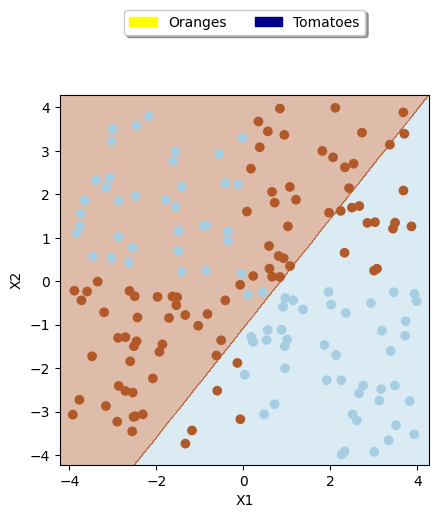

In [32]:
Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch], loc='upper center',bbox_to_anchor=(0.5, 1.25),ncol=2, fancybox=True, shadow=True)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')

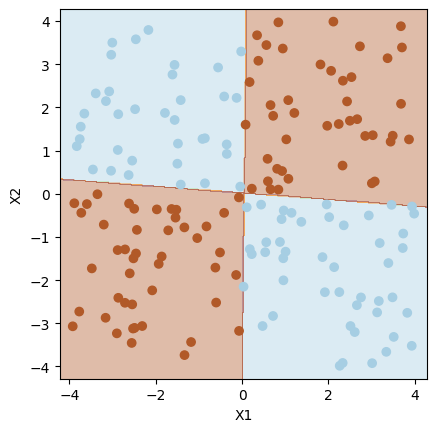

In [33]:
# Add new features
X_train_extended = np.hstack((X_train,
                              (X_train[:, 0] * X_train[:, 1])[:, None],  # Reshape to (170, 1)
                              (X_train[:, 0]**2)[:, None],         # Reshape to (170, 1)
                              (X_train[:, 1]**2)[:, None]))        # Reshape to (170, 1)
# print(X_train_extended)

# Apply the same changes to X_val_extended and X_test_extended
X_val_extended = np.hstack((X_val,
                            (X_val[:, 0] * X_val[:, 1])[:, None],
                            (X_val[:, 0]**2)[:, None],
                            (X_val[:, 1]**2)[:, None]))

X_test_extended = np.hstack((X_test,
                             (X_test[:, 0] * X_test[:, 1])[:, None],
                             (X_test[:, 0]**2)[:, None],
                             (X_test[:, 1]**2)[:, None]))

# Train logistic regression with extended features
clf = LogisticRegression(penalty=None, solver='newton-cg')
clf.fit(X_train_extended, Y_train)

# ... (Rest of your code for plotting the decision boundary) ...

# Create meshgrid for plotting
X = np.vstack((X_train_extended[:, 0], X_train_extended[:, 1])).T
y = Y_train
x_min, x_max = X_train_extended[:, 0].min() - 0.3, X_train_extended[:, 0].max() + 0.3
y_min, y_max = X_train_extended[:,1].min() - 0.3, X_train_extended[:,1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), (xx.ravel() * yy.ravel()), xx.ravel()**2, yy.ravel()**2])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()